In [3]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv"

In [5]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [6]:
df_training.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 5)

In [8]:
df_training.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [79]:
# What are the features?

# TV: advertising dollars spent on TV for a single product in a given market 
#    (in thousands of dollars)
# Radio: advertising dollars spent on Radio
# Newspaper: advertising dollars spent on Newspaper

# What is the response?

# Sales: sales of a single product in a given market (in thousands of items)

# What else do we know?

# Because the response variable is continuous, this is a regression problem.
# There are 200 observations (represented by the rows), and each observation is a single market.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


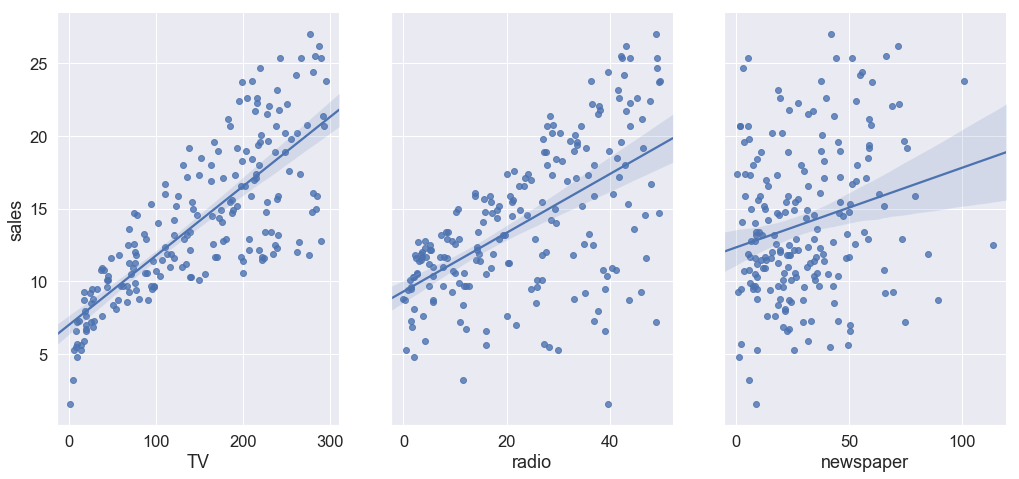

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training, 
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             size=7, 
             aspect=0.7, 
             kind='reg');

In [81]:
# Linear regression
# Pros: fast, no tuning required, highly interpretable, well-understood

# Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship 
#                                                         between the features and response)

In [82]:
df_training.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
118,119,125.7,36.9,79.2,15.9
130,131,0.7,39.6,8.7,1.6
167,168,206.8,5.2,19.4,12.2
122,123,224.0,2.4,15.6,11.6
148,149,38.0,40.3,11.9,10.9


In [10]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

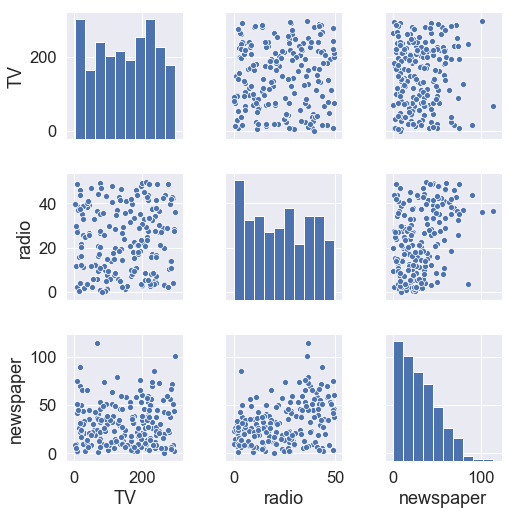

In [11]:
sns.pairplot( X);

In [84]:
# The diagonal of the above matirx shows the auto-correlation of the variables. 
# It is always 1. 

# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

# variables with strong correlations are mostly probably candidates for model builing.**
df_training.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


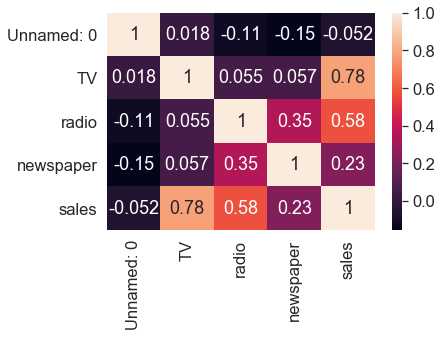

In [12]:
sns.heatmap( df_training.corr(), annot=True );

In [17]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [16]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [18]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# return beta coeff
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [20]:
linreg.intercept_

2.9372157346906107

In [57]:
y_test.shape

(60,)

In [26]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [24]:
y_pred.shape

(60,)

In [25]:
y_test.shape

(60,)

In [27]:
feature_cols

['TV', 'radio', 'newspaper']

In [28]:
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [29]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046952047768484634),
 ('radio', 0.17658643526817372),
 ('newspaper', 0.0018511533188922125)]

In [65]:
# coefficients from sm
# linreg_sm.params

In [66]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper

# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [67]:
# summary report from sm
# linreg_sm.summary()

In [30]:
# Model evaluation metrics for regression

print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  2.9372157346906107
beta coefficients       :  [0.04695205 0.17658644 0.00185115]
Mean Abs Error   MAE    :  1.0548328405073322
Mean Sq  Error MSE      :  1.9289249074665724
Root Mean Sq Error RMSE :  1.3888574107756968
r2 value                :  0.9224605706201435


In [69]:
df_training.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [74]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [75]:
# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending 
# is associated with a 0.0466 "unit" increase in Sales.

# Important notes:

# This is a statement of association, not causation.

# If an increase in TV ad spending was associated with a decrease in sales, 
# beta_1 would be negative.

In [76]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [77]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
1.0548328405073322


In [78]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

150.0
1.9289249074665724


In [79]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
1.3888574107756968


In [80]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3888574107756968


In [81]:
# Feature selection
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046952047768484634),
 ('radio', 0.17658643526817372),
 ('newspaper', 0.0018511533188922125)]

In [34]:
# what does the coeff for newspaper say?

# For a given amount of Radio and TV adv spending, a "unit" increase in newspaper adv spending 
# is associated with a 0.0018 "unit" increase in Sales.

# can we remove the feature called 'newspaper'?

In [83]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.3879034699382886


In [ ]:
# old RMSE : 1.3888574107756968

In [78]:
# The RMSE decreased when we removed Newspaper from the model. 
# (Error is something we want to minimize, so a lower number for RMSE is better.) 
# Thus, it is unlikely that this feature is useful for predicting Sales, 
# and should be removed from the model.

In [79]:
# calculate r2 score

y_true_ex = [3, -0.5, 2, 7]
y_pred_ex = [2.5, 0.0, 2, 8]
print(metrics.r2_score(y_true_ex, y_pred_ex))

0.948608137045


In [80]:
# calculate r2-score for our sales example
print(metrics.r2_score(y_test, y_pred))

0.917621494225


In [70]:
residual = y_pred - y_test

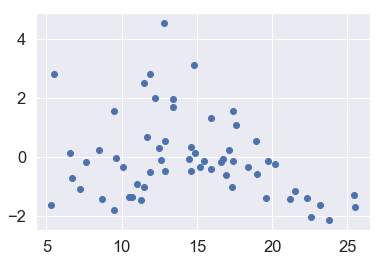

In [72]:
plt.scatter(y_test, residual)